In [2]:
import json

In [3]:
file = json.load(open('textinthewild_data_info.json', encoding='UTF8'))
file.keys()

dict_keys(['info', 'images', 'annotations', 'licenses'])

In [4]:
file['images'][0]['type']=='book'

True

In [5]:
signs = [f for f in file['images'] if f['type']=='traffic sign']
len(signs)

26784

In [6]:
signs[0]

{'id': '00047089',
 'width': 1920,
 'height': 1440,
 'file_name': '00024467863E82F72B18598125DAE6B5.jpg',
 'type': 'traffic sign'}

In [37]:
annotation = [a for a in file['annotations'] if a['image_id']==signs[0]['id'] and a['attributes']]
#['class']=='word']
annotation

[{'id': '01023246',
  'image_id': '00047089',
  'text': '기가',
  'attributes': {'class': 'word'},
  'bbox': [566, 512, 172, 89]},
 {'id': '01023247',
  'image_id': '00047089',
  'text': '인터넷',
  'attributes': {'class': 'word'},
  'bbox': [774, 513, 261, 88]},
 {'id': '01023248',
  'image_id': '00047089',
  'text': 'IPTV',
  'attributes': {'class': 'word'},
  'bbox': [1089, 517, 221, 75]},
 {'id': '01023249',
  'image_id': '00047089',
  'text': '방송',
  'attributes': {'class': 'word'},
  'bbox': [1371, 510, 169, 91]},
 {'id': '01023250',
  'image_id': '00047089',
  'text': 'olleh',
  'attributes': {'class': 'word'},
  'bbox': [876, 865, 232, 72]},
 {'id': '01023251',
  'image_id': '00047089',
  'text': '기',
  'attributes': {'class': 'character'},
  'bbox': [566, 511, 76, 89]},
 {'id': '01023252',
  'image_id': '00047089',
  'text': '가',
  'attributes': {'class': 'character'},
  'bbox': [657, 512, 82, 90]},
 {'id': '01023253',
  'image_id': '00047089',
  'text': '인',
  'attributes': {'clas

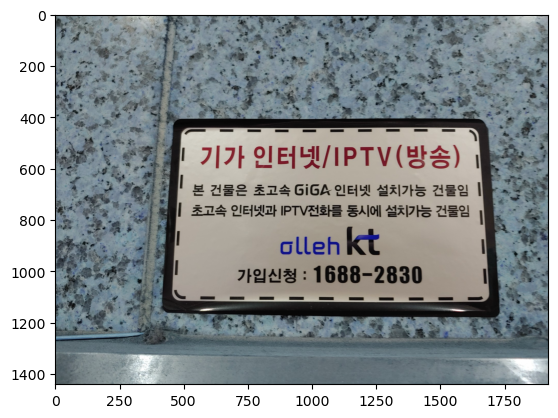

In [9]:
# 시각화
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('01_textinthewild_traffic_sign_images_new/Traffic_Sign/'+signs[0]['file_name'])
plt.imshow(img)

In [10]:
len(signs)

26784

In [18]:
import os
sign_files = os.listdir('01_textinthewild_traffic_sign_images_new/Traffic_Sign/')
len(sign_files)

26784

In [19]:
# train, vaild,test 나누기
import random
random.shuffle(sign_files)
n_train = int(len(sign_files)*0.7)
n_validation = int(len(sign_files)*0.15)
n_test = int(len(sign_files)*0.15)
print(n_train, n_validation, n_test)

18748 4017 4017


In [21]:
train_files = sign_files[:n_train]
validation_files = sign_files[n_train:n_train+n_validation]
test_files = sign_files[-n_test:]

In [28]:
# 이미지에 해당하는 id값을 저장
train_img_ids = {} # {filename}: {image id}
valid_img_ids = {}
test_img_ids ={}

for image in file['images']: # {filename}: {image id}
    if image['file_name'] in train_files:
        train_img_ids[image['file_name']] = image['id']
    elif image['file_name'] in validation_files:
        valid_img_ids[image['file_name']] = image['id']
    elif image['file_name'] in test_files:
        test_img_ids[image['file_name']] = image['id']

In [47]:
# 이미지에 해당하는 annotation을 저장
train_annotations = {f:[] for f in train_img_ids.keys()} # {image id}: []
valid_annotations = {f:[] for f in valid_img_ids.keys()}
test_annotations = {f:[] for f in test_img_ids.keys()}


train_ids_img = {train_img_ids[id_]:id_ for id_ in train_img_ids} # {image_id : file_name}
valid_ids_img = {valid_img_ids[id_]:id_ for id_ in valid_img_ids}
test_ids_img = {test_img_ids[id_]:id_ for id_ in test_img_ids}

In [46]:
train_ids_img['00048419']

'0D98FB6754A2B898A85BE2DA55885927.jpg'

In [48]:
for idx, annotation in enumerate(file['annotations']):
    if annotation['attributes']['class'] != 'word':
        continue
    if annotation['image_id'] in train_ids_img:
        train_annotations[train_ids_img[annotation['image_id']]].append(annotation)
    elif annotation['image_id'] in valid_ids_img:
        valid_annotations[valid_ids_img[annotation['image_id']]].append(annotation)
    elif annotation['image_id'] in test_ids_img:
        test_annotations[test_ids_img[annotation['image_id']]].append(annotation)


0 / 2096460 processed
5000 / 2096460 processed
10000 / 2096460 processed
15000 / 2096460 processed
20000 / 2096460 processed
25000 / 2096460 processed
30000 / 2096460 processed
35000 / 2096460 processed
40000 / 2096460 processed
45000 / 2096460 processed
50000 / 2096460 processed
55000 / 2096460 processed
60000 / 2096460 processed
65000 / 2096460 processed
70000 / 2096460 processed
75000 / 2096460 processed
80000 / 2096460 processed
85000 / 2096460 processed
90000 / 2096460 processed
95000 / 2096460 processed
100000 / 2096460 processed
105000 / 2096460 processed
110000 / 2096460 processed
115000 / 2096460 processed
120000 / 2096460 processed
125000 / 2096460 processed
130000 / 2096460 processed
135000 / 2096460 processed
140000 / 2096460 processed
145000 / 2096460 processed
150000 / 2096460 processed
155000 / 2096460 processed
160000 / 2096460 processed
165000 / 2096460 processed
170000 / 2096460 processed
175000 / 2096460 processed
180000 / 2096460 processed
185000 / 2096460 processed

1625000 / 2096460 processed
1630000 / 2096460 processed
1635000 / 2096460 processed
1640000 / 2096460 processed
1645000 / 2096460 processed
1650000 / 2096460 processed
1655000 / 2096460 processed
1660000 / 2096460 processed
1665000 / 2096460 processed
1670000 / 2096460 processed
1675000 / 2096460 processed
1680000 / 2096460 processed
1685000 / 2096460 processed
1690000 / 2096460 processed
1695000 / 2096460 processed
1700000 / 2096460 processed
1705000 / 2096460 processed
1710000 / 2096460 processed
1715000 / 2096460 processed
1720000 / 2096460 processed
1725000 / 2096460 processed
1730000 / 2096460 processed
1735000 / 2096460 processed
1740000 / 2096460 processed
1745000 / 2096460 processed
1750000 / 2096460 processed
1755000 / 2096460 processed
1760000 / 2096460 processed
1765000 / 2096460 processed
1770000 / 2096460 processed
1775000 / 2096460 processed
1780000 / 2096460 processed
1785000 / 2096460 processed
1790000 / 2096460 processed
1795000 / 2096460 processed
1800000 / 2096460 pr

In [54]:
len(train_annotations), len(valid_annotations), len(test_annotations)

(18748, 4017, 4017)

In [55]:
with open('train_annotation.json', 'w') as file:
    json.dump(train_annotations, file)
with open('valid_annotation.json', 'w') as file:
    json.dump(valid_annotations, file)
with open('test_annotation.json', 'w') as file:
    json.dump(test_annotations, file)

In [56]:
train_annot = json.load(open('train_annotation.json', encoding='UTF8'))
train_annot

{'00024467863E82F72B18598125DAE6B5.jpg': [{'id': '01023246',
   'image_id': '00047089',
   'text': '기가',
   'attributes': {'class': 'word'},
   'bbox': [566, 512, 172, 89]},
  {'id': '01023247',
   'image_id': '00047089',
   'text': '인터넷',
   'attributes': {'class': 'word'},
   'bbox': [774, 513, 261, 88]},
  {'id': '01023248',
   'image_id': '00047089',
   'text': 'IPTV',
   'attributes': {'class': 'word'},
   'bbox': [1089, 517, 221, 75]},
  {'id': '01023249',
   'image_id': '00047089',
   'text': '방송',
   'attributes': {'class': 'word'},
   'bbox': [1371, 510, 169, 91]},
  {'id': '01023250',
   'image_id': '00047089',
   'text': 'olleh',
   'attributes': {'class': 'word'},
   'bbox': [876, 865, 232, 72]}],
 '000B7167D8521139AE0DF9B387C034D5.jpg': [{'id': '01023289',
   'image_id': '00047090',
   'text': '서울자전거',
   'attributes': {'class': 'word'},
   'bbox': [526, 643, 95, 35]},
  {'id': '01023290',
   'image_id': '00047090',
   'text': '919.',
   'attributes': {'class': 'word'},
  

In [57]:
valid_annot = json.load(open('valid_annotation.json', encoding='UTF8'))
valid_annot

{'003D9601B85230B3E64917DAA161A51E.jpg': [{'id': '01023697',
   'image_id': '00047110',
   'text': '진흥로',
   'attributes': {'class': 'word'},
   'bbox': [749, 305, 76, 30]},
  {'id': '01023698',
   'image_id': '00047110',
   'text': 'Moms',
   'attributes': {'class': 'word'},
   'bbox': [778, 767, 112, 38]},
  {'id': '01023699',
   'image_id': '00047110',
   'text': 'Manager',
   'attributes': {'class': 'word'},
   'bbox': [920, 769, 178, 48]}],
 '003ECC2A82A9E2BF25A2A7600FBC8E20.jpg': [{'id': '01023762',
   'image_id': '00047112',
   'text': '신장로141번길',
   'attributes': {'class': 'word'},
   'bbox': [689, 453, 421, 76]},
  {'id': '01023763',
   'image_id': '00047112',
   'text': 'gil',
   'attributes': {'class': 'word'},
   'bbox': [1077, 529, 44, 39]},
  {'id': '01023766',
   'image_id': '00047112',
   'text': 'ro',
   'attributes': {'class': 'word'},
   'bbox': [843, 543, 36, 24]}],
 '0052BA9EFA524B07579B7BD2921C3384.jpg': [{'id': '01023842',
   'image_id': '00047116',
   'text': '은

In [58]:
test_annot = json.load(open('test_annotation.json', encoding='UTF8'))
test_annot

{'001FFC1C5E20FEB39F5CB2012973BB21.jpg': [{'id': '01023433',
   'image_id': '00047097',
   'text': 'STOP',
   'attributes': {'class': 'word'},
   'bbox': [428, 603, 992, 446]},
  {'id': '01023434',
   'image_id': '00047097',
   'text': 'ALL',
   'attributes': {'class': 'word'},
   'bbox': [545, 1353, 257, 133]},
  {'id': '01023435',
   'image_id': '00047097',
   'text': 'WAY',
   'attributes': {'class': 'word'},
   'bbox': [900, 1360, 290, 137]},
  {'id': '01023436',
   'image_id': '00047097',
   'text': 'EDT',
   'attributes': {'class': 'word'},
   'bbox': [645, 1194, 52, 33]}],
 '003D75C007861D3243EC1F139F7818FC.jpg': [{'id': '01023670',
   'image_id': '00047109',
   'text': '화장실',
   'attributes': {'class': 'word'},
   'bbox': [957, 646, 317, 91]},
  {'id': '01023680',
   'image_id': '00047109',
   'text': 'GENTLEMEN',
   'attributes': {'class': 'word'},
   'bbox': [947, 752, 347, 67]}],
 '003DD729417A74A449331422C63084A2.jpg': [{'id': '01023715',
   'image_id': '00047111',
   'text